### Using RF and SVM


In [1]:
import pandas as pd
import pandas_profiling as pf

In [6]:
import pandas as pd

df_data = pd.read_csv ("~/GitHub/QTW_Case_Studies/Case_Study_8/case_8.csv")

In [7]:
df_data.describe()

ID         target            v1            v2            v4  \
count  114321.000000  114321.000000  1.143210e+05  1.143210e+05  1.143210e+05   
mean   114228.928228       0.761199  1.630686e+00  7.464411e+00  4.145098e+00   
std     65934.487362       0.426353  8.132649e-01  2.225036e+00  8.626621e-01   
min         3.000000       0.000000 -9.996497e-07 -9.817614e-07 -6.475929e-07   
25%     57280.000000       1.000000  1.346153e+00  6.575770e+00  4.068697e+00   
50%    114189.000000       1.000000  1.630686e+00  7.464411e+00  4.145098e+00   
75%    171206.000000       1.000000  1.630686e+00  7.551501e+00  4.340229e+00   
max    228713.000000       1.000000  2.000000e+01  2.000000e+01  2.000000e+01   

                 v5            v6            v7            v8            v9  \
count  1.143210e+05  1.143210e+05  1.143210e+05  1.143210e+05  1.143210e+05   
mean   8.742359e+00  2.436402e+00  2.483921e+00  1.496569e+00  9.031859e+00   
std    1.543441e+00  4.506138e-01  4.427150e-01  2.109786e+00  1.449542e+00   
min   -5.287068e-07 -9.055091e-07 -9.468765e-07 -7.783778e-07 -9.828757e-07   
25%    8.394090e+00  2.340968e+00  2.376586e+00  2.653147e-01  8.813560e+00   
50%    8.742359e+00  2.436402e+00  2.483921e+00  1.496569e+00  9.031859e+00   
75%    8.924798e+00  2.484699e+00  2.528445e+00  1.496569e+00  9.302325e+00   
max    2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01  2.000000e+01   

       ...          v121          v122           v123          v124  \
count  ...  1.143210e+05  1.143210e+05  114321.000000  1.143210e+05   
mean   ...  2.737596e+00  6.822439e+00       3.549938  9.198120e-01   
std    ...  1.018603e+00  1.348700e+00       1.943431  1.591555e+00   
min    ... -9.820642e-07 -9.978497e-07       0.019139 -9.994953e-07   
25%    ...  2.282609e+00  6.519607e+00       2.571053  8.471320e-02   
50%    ...  2.737596e+00  6.822439e+00       3.549938  9.198120e-01   
75%    ...  2.737596e+00  6.999999e+00       3.549938  9.198120e-01   
max    ...  2.000000e+01  2.000000e+01      19.686069  2.000000e+01   

               v126          v127          v128           v129          v130  \
count  1.143210e+05  1.143210e+05  1.143210e+05  114321.000000  1.143210e+05   
mean   1.672658e+00  3.239542e+00  2.030373e+00       0.310144  1.925763e+00   
std    3.779128e-01  1.221225e+00  8.143413e-01       0.693262  9.496402e-01   
min   -9.564174e-07 -9.223798e-07  8.197812e-07       0.000000 -9.901257e-07   
25%    1.570974e+00  2.762497e+00  1.681261e+00       0.000000  1.449477e+00   
50%    1.672658e+00  3.239542e+00  2.030373e+00       0.000000  1.925763e+00   
75%    1.672658e+00  3.239542e+00  2.030373e+00       0.000000  1.925763e+00   
max    1.563161e+01  2.000000e+01  2.000000e+01      11.000000  2.000000e+01   

               v131  
count  1.143210e+05  
mean   1.739389e+00  
std    8.518204e-01  
min   -9.999134e-07  
25%    1.463414e+00  
50%    1.739389e+00  
75%    1.739389e+00  
max    2.000000e+01  

[8 rows x 114 columns]

In [8]:
df_data.head()

ID  target        v1        v2 v3        v4         v5        v6        v7  \
0   3       1  1.335739  8.727474  C  3.921026   7.915266  2.599278  3.176895   
1   4       1  1.630686  7.464411  C  4.145098   9.191265  2.436402  2.483921   
2   5       1  0.943877  5.310079  C  4.410969   5.326159  3.979592  3.928571   
3   6       1  0.797415  8.304757  C  4.225930  11.627438  2.097700  1.987549   
4   8       1  1.630686  7.464411  C  4.145098   8.742359  2.436402  2.483921   

         v8  ...      v122      v123      v124  v125      v126      v127  \
0  0.012941  ...  8.000000  1.989780  0.035754    AU  1.804126  3.113719   
1  2.301630  ...  6.822439  3.549938  0.598896    AF  1.672658  3.239542   
2  0.019645  ...  9.333333  2.477596  0.013452    AE  1.773709  3.922193   
3  0.171947  ...  7.018256  1.812795  0.002267    CJ  1.415230  2.954381   
4  1.496569  ...  6.822439  3.549938  0.919812     Z  1.672658  3.239542   

       v128  v129      v130      v131  
0  2.024285     0  0.636365  2.857144  
1  1.957825     0  1.925763  1.739389  
2  1.120468     2  0.883118  1.176472  
3  1.990847     1  1.677108  1.034483  
4  2.030373     0  1.925763  1.739389  

[5 rows x 133 columns]

In [9]:
df_data.tail()

ID  target        v1        v2 v3        v4         v5        v6  \
114316  228708       1  1.630686  7.464411  C  4.145098   8.742359  2.436402   
114317  228710       1  1.630686  7.464411  C  4.145098   8.742359  2.436402   
114318  228711       1  1.630686  7.464411  C  4.145098  10.069277  2.436402   
114319  228712       1  1.630686  7.464411  C  4.145098  10.106144  2.436402   
114320  228713       1  1.619763  7.932978  C  4.640085   8.473141  2.351470   

              v7        v8  ...      v122      v123      v124  v125      v126  \
114316  2.483921  1.496569  ...  6.822439  3.549938  0.919812    AL  1.672658   
114317  2.483921  1.496569  ...  6.822439  3.549938  0.919812     E  1.672658   
114318  2.483921  0.323324  ...  6.822439  3.549938  0.156764     Q  1.672658   
114319  2.483921  0.309226  ...  6.822439  3.549938  0.490658    BW  1.672658   
114320  2.826766  3.479754  ...  7.936508  2.944285  3.135205     V  1.943149   

            v127      v128  v129      v130      v131  
114316  3.239542  2.030373     0  1.925763  1.739389  
114317  3.239542  2.030373     1  1.925763  1.739389  
114318  3.239542  2.417606     2  1.925763  1.739389  
114319  3.239542  3.526650     0  1.925763  1.739389  
114320  4.385553  1.604493     0  1.787610  1.386138  

[5 rows x 133 columns]

In [10]:
from pandas_profiling import ProfileReport
ProfileReport(df_data,minimal=True)

In [11]:
corr = df_data.corr()

<Figure size 1800x1800 with 0 Axes>

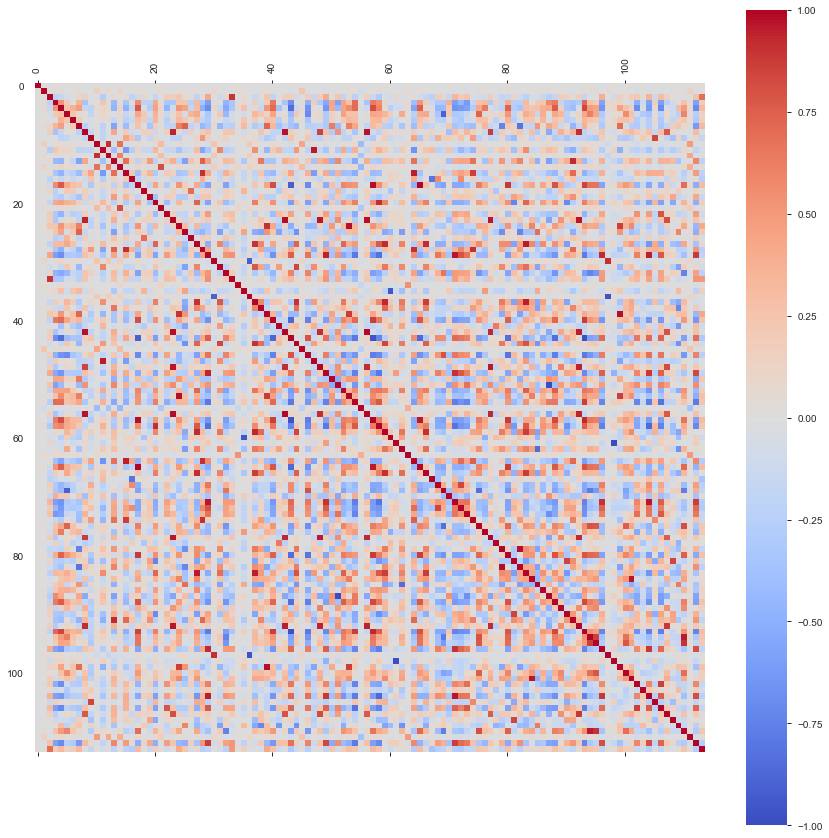

In [12]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(25,25))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation=90)
fig.set_size_inches(15, 15)
plt.show()

In [ ]:
### Does not give us a very presentable output, but we can see that there are some columns with very high correlation 

In [ ]:
import numpy as np
high_corr_var=np.where(corr > 0.95)
high_corr_var=[(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [ ]:
high_corr_var

In [ ]:
neg_corr_var = np.where(corr < -0.90)
neg_corr_var = [(corr.columns[x],corr.columns[y]) for x,y in zip(*neg_corr_var) if x!=y and x<y]

In [ ]:
neg_corr_var

In [16]:
df_data.v22.head()

0     XDX
1     GUV
2      FQ
3    ACUE
4     HIT
Name: v22, dtype: object

In [17]:
df_data.drop('v22',axis=1,inplace=True)

In [18]:
#### For now just dropping the columns that have a very high positive and negative corelation. 

In [19]:
cols = df_data.dtypes
display(df_data.loc[:,cols == "object"])
columns = df_data.loc[:,cols == "object"].columns

v3 v24 v30 v31 v47 v52 v56 v66 v71 v74 v75 v79 v91 v107 v110 v112 v113  \
0       C   C   C   A   C   G  DI   C   F   B   D   E   A    E    B    O    G   
1       C   C   C   A   E   G  DY   A   F   B   D   D   B    B    A    U    G   
2       C   E   C   A   C   F  AS   A   B   B   B   E   G    C    B    S    G   
3       C   D   C   B   C   H  BW   A   F   B   D   B   B    B    B    J    G   
4       C   E   C   A   I   H  BW   C   F   B   D   C   G    C    A    T    G   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   
114316  C   E   C   A   I   E   N   A   B   B   B   C   A    E    A    U    G   
114317  C   D   C   B   C   I  BW   A   F   B   D   B   G    C    B    J    G   
114318  C   A   C   B   C   D  BW   A   B   B   B   B   G    C    B    R    G   
114319  C   D   G   A   C   J  AS   A   F   B   D   E   A    E    B    A    G   
114320  C   C   C   A   C   G  DA   C   F   B   D   E   F    A    B    A    G   

       v125  
0        AU  
1        AF  
2        AE  
3        CJ  
4         Z  
...     ...  
114316   AL  
114317    E  
114318    Q  
114319   BW  
114320    V  

[114321 rows x 18 columns]

In [20]:
from tqdm import tqdm

data = [ pd.get_dummies(df_data[col], prefix=col).copy() for col in tqdm(columns) ]
one_hot_df = pd.concat(data, axis=1)

display(one_hot_df.head())


100%|██████████| 18/18 [00:00<00:00, 68.62it/s]


v3_A  v3_B  v3_C  v24_A  v24_B  v24_C  v24_D  v24_E  v30_A  v30_B  ...  \
0     0     0     1      0      0      1      0      0      0      0  ...   
1     0     0     1      0      0      1      0      0      0      0  ...   
2     0     0     1      0      0      0      0      1      0      0  ...   
3     0     0     1      0      0      0      1      0      0      0  ...   
4     0     0     1      0      0      0      0      1      0      0  ...   

   v125_Q  v125_R  v125_S  v125_T  v125_U  v125_V  v125_W  v125_X  v125_Y  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   v125_Z  
0       0  
1       0  
2       0  
3       0  
4       1  

[5 rows x 364 columns]

In [22]:
#Drop old columns
df_data_nc = df_data.drop(columns, axis=1)

df_data_final = pd.concat([df_data_nc, one_hot_df], axis=1)

print(df_data_final.shape)
display(df_data_final.head())

(114321, 478)


ID  target        v1        v2        v4         v5        v6        v7  \
0   3       1  1.335739  8.727474  3.921026   7.915266  2.599278  3.176895   
1   4       1  1.630686  7.464411  4.145098   9.191265  2.436402  2.483921   
2   5       1  0.943877  5.310079  4.410969   5.326159  3.979592  3.928571   
3   6       1  0.797415  8.304757  4.225930  11.627438  2.097700  1.987549   
4   8       1  1.630686  7.464411  4.145098   8.742359  2.436402  2.483921   

         v8         v9  ...  v125_Q  v125_R  v125_S  v125_T  v125_U  v125_V  \
0  0.012941   9.999999  ...       0       0       0       0       0       0   
1  2.301630   9.031859  ...       0       0       0       0       0       0   
2  0.019645  12.666667  ...       0       0       0       0       0       0   
3  0.171947   8.965516  ...       0       0       0       0       0       0   
4  1.496569   9.031859  ...       0       0       0       0       0       0   

   v125_W  v125_X  v125_Y  v125_Z  
0       0       0       0       0  
1       0       0       0       0  
2       0       0       0       0  
3       0       0       0       0  
4       0       0       0       1  

[5 rows x 478 columns]

In [21]:
import numpy as np
def reduce_features(df, verbose = False):
    # calculate the correlation matrix
    corr_matrix  = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    #Get all of the correlation values > 95%
    x = np.where(upper > 0.95)

    #Display all field combinations with > 95% correlation
    cf = pd.DataFrame()
    cf['Field1'] = upper.columns[x[1]]
    cf['Field2'] = upper.index[x[0]]

    #Get the correlation values for every field combination. (There must be a more pythonic way to do this!)
    corr = [0] * len(cf)
    for i in range(0, len(cf)):
        corr[i] =  upper[cf['Field1'][i]][cf['Field2'][i]] 

    cf['Correlation'] = corr

    if( verbose ):
        print('There are ', str(len(cf['Field1'])), ' field correlations > 95%.')
        display(cf)
        
        print('Dropping the following ', str(len(to_drop)), ' highly correlated fields.')
        to_drop
        
    #Check columns before drop 
    if( verbose ):
        print('\r\n*********Before: Dropping Highly Correlated Fields*************************************')
        display(df.info(verbose=False))

    # Drop the highly correlated features from our training data 
    df = df.drop(to_drop, axis=1)

    #Check columns after drop 
    if( verbose ):
        print('\r\n*********After: Dropping Highly Correlated Fields**************************************')
        df.info(verbose=False)
    
    return df

In [23]:
df_data_encoded = reduce_features(df_data_final, True)

There are  46  field correlations > 95%.


Field1  Field2  Correlation
0       v46      v8     0.975192
1       v63      v8     0.975974
2       v53     v11     0.955757
3       v64     v17     0.982626
4       v76     v17     0.992671
5       v46     v25     0.982215
6       v54     v25     0.967925
7       v63     v25     0.981040
8       v89     v25     0.964606
9      v105     v25     0.962163
10      v60     v26     0.980747
11      v96     v29     0.957029
12      v83     v33     0.964302
13     v114     v40     0.966351
14      v96     v41     0.950463
15     v116     v43     0.977874
16      v63     v46     0.991609
17      v64     v48     0.962521
18     v106     v48     0.980726
19      v89     v54     0.956307
20     v100     v58     0.997665
21      v76     v64     0.953863
22     v115     v69     0.993691
23     v121     v83     0.965987
24      v95     v92     0.977089
25     v118     v97     0.962461
26     v128    v108     0.957299
27    v79_R   v47_B     1.000000
28   v110_B   v47_C     0.999982
29   v110_C   v47_D     0.991951
30    v79_D   v47_E     0.999901
31    v79_K   v47_F     0.998316
32    v79_M   v47_G     1.000000
33   v56_AX   v47_H     1.000000
34    v75_B   v71_F     0.999282
35    v75_D   v71_F     0.999825
36    v74_C   v74_B     0.969791
37    v75_D   v75_B     0.999185
38   v107_E   v91_A     1.000000
39   v107_B   v91_B     1.000000
40   v107_D   v91_C     1.000000
41   v107_G   v91_D     1.000000
42   v107_F   v91_E     1.000000
43   v107_A   v91_F     1.000000
44   v107_C   v91_G     1.000000
45  v125_AE  v112_S     1.000000

Dropping the following  38  highly correlated fields.

*********Before: Dropping Highly Correlated Fields*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 478 entries, ID to v125_Z
dtypes: float64(108), int64(6), uint8(364)
memory usage: 139.1 MB


None


*********After: Dropping Highly Correlated Fields**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 440 entries, ID to v125_Z
dtypes: float64(88), int64(6), uint8(346)
memory usage: 119.7 MB


In [24]:
df_data_encoded.head()

ID  target        v1        v2        v4         v5        v6        v7  \
0   3       1  1.335739  8.727474  3.921026   7.915266  2.599278  3.176895   
1   4       1  1.630686  7.464411  4.145098   9.191265  2.436402  2.483921   
2   5       1  0.943877  5.310079  4.410969   5.326159  3.979592  3.928571   
3   6       1  0.797415  8.304757  4.225930  11.627438  2.097700  1.987549   
4   8       1  1.630686  7.464411  4.145098   8.742359  2.436402  2.483921   

         v8         v9  ...  v125_Q  v125_R  v125_S  v125_T  v125_U  v125_V  \
0  0.012941   9.999999  ...       0       0       0       0       0       0   
1  2.301630   9.031859  ...       0       0       0       0       0       0   
2  0.019645  12.666667  ...       0       0       0       0       0       0   
3  0.171947   8.965516  ...       0       0       0       0       0       0   
4  1.496569   9.031859  ...       0       0       0       0       0       0   

   v125_W  v125_X  v125_Y  v125_Z  
0       0       0       0       0  
1       0       0       0       0  
2       0       0       0       0  
3       0       0       0       0  
4       0       0       0       1  

[5 rows x 440 columns]

In [25]:
labels = df_data_encoded.target

In [27]:
df_data_encoded_X = df_data_encoded.drop(["ID","target"],axis = 1)

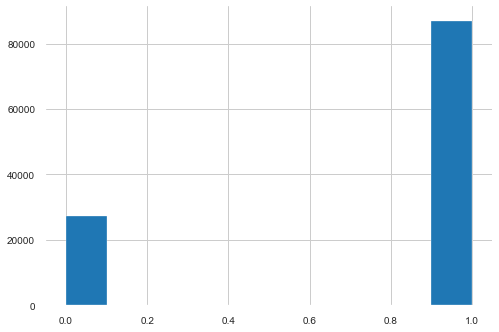

In [28]:
labels.hist()

In [29]:
# the dataset is not balanced, therefore we will have to use stratification

In [30]:
#### Stratified Test, Train Validation Split 

### First Lets do 60 and 20. 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_data_encoded_X, labels,
                                                    stratify=labels, 
                                                    test_size=0.60,
                                                    random_state=123)





In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.feature_selection as fs
from sklearn.model_selection import cross_val_score
import timeit
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt

In [64]:


param_grid = { 
    'n_estimators': [12,15,20,25],
    'max_features': ['auto','sqrt'],
    'max_depth' : [10,11,12,20],
    'criterion' :['gini', 'entropy'],
    'min_samples_split':[1,2,3,4,10],
    'min_samples_leaf' :[1,2,3,4,10],
    'ccp_alpha': [0.02,0.05,0.1,1,2,3]
}

# Get the processing time to compare it with running the Grid Search in Parallel Mode
start_time = timeit.default_timer()

rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs = -1)
CV_rfc_mod = CV_rfc.fit(X_train, y_train)

#Elapsed time required for grid search
elapsed_rf_nonparallel = timeit.default_timer() - start_time

RF_score = CV_rfc.score(X_test,y_test)
RF_ypred = CV_rfc.predict(X_test)
RFCV_matrix = metrics.confusion_matrix(y_test, RF_ypred)

print('Random Forest GridSearch Accuracy: ', RF_score)
print('Random Forest Matrix: ', RFCV_matrix)
print('Best Parameter: ', CV_rfc.best_params_)
print('\nClassification report')
print(classification_report(y_test,RF_ypred))

Random Forest GridSearch Accuracy:  0.7612001224614756
Random Forest Matrix:  [[    0 16380]
 [    0 52213]]
Best Parameter:  {'ccp_alpha': 0.02, 'n_estimators': 12}

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16380
           1       0.76      1.00      0.86     52213

    accuracy                           0.76     68593
   macro avg       0.38      0.50      0.43     68593
weighted avg       0.58      0.76      0.66     68593



/Users/shantanu/opt/anaconda3/envs/LIME/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
df_gridsearch2 = pd.DataFrame(CV_rfc.cv_results_)

In [75]:
df_gridsearch2.head(20)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        7.106365      0.067155         0.038383        0.003993   
1        8.213440      0.432935         0.047637        0.008298   
2       10.350599      0.043375         0.046546        0.006250   
3       12.965592      0.073458         0.048841        0.006884   
4        6.429771      0.101648         0.046982        0.011196   
5        8.042463      0.046719         0.044949        0.007834   
6       10.499448      0.068996         0.050006        0.007083   
7       13.168486      0.214447         0.049843        0.006139   
8        6.591739      0.149180         0.042751        0.005040   
9        8.272671      0.115522         0.047853        0.008553   
10      10.856838      0.055667         0.048087        0.005409   
11      13.734837      0.337725         0.054328        0.008941   
12       7.243451      0.307312         0.050819        0.005051   
13       8.605395      0.261022         0.045930        0.007030   
14      11.168501      0.052387         0.050842        0.005477   
15      13.812922      0.101814         0.052970        0.006942   
16       6.795203      0.188562         0.045723        0.007561   
17       8.786744      0.124431         0.047237        0.004907   
18      11.079915      0.143812         0.054451        0.019070   
19      13.984057      0.078175         0.055672        0.010571   

   param_ccp_alpha param_n_estimators  \
0             0.02                 12   
1             0.02                 15   
2             0.02                 20   
3             0.02                 25   
4             0.05                 12   
5             0.05                 15   
6             0.05                 20   
7             0.05                 25   
8              0.1                 12   
9              0.1                 15   
10             0.1                 20   
11             0.1                 25   
12               1                 12   
13               1                 15   
14               1                 20   
15               1                 25   
16               2                 12   
17               2                 15   
18               2                 20   
19               2                 25   

                                     params  split0_test_score  \
0   {'ccp_alpha': 0.02, 'n_estimators': 12}           0.761207   
1   {'ccp_alpha': 0.02, 'n_estimators': 15}           0.761207   
2   {'ccp_alpha': 0.02, 'n_estimators': 20}           0.761207   
3   {'ccp_alpha': 0.02, 'n_estimators': 25}           0.761207   
4   {'ccp_alpha': 0.05, 'n_estimators': 12}           0.761207   
5   {'ccp_alpha': 0.05, 'n_estimators': 15}           0.761207   
6   {'ccp_alpha': 0.05, 'n_estimators': 20}           0.761207   
7   {'ccp_alpha': 0.05, 'n_estimators': 25}           0.761207   
8    {'ccp_alpha': 0.1, 'n_estimators': 12}           0.761207   
9    {'ccp_alpha': 0.1, 'n_estimators': 15}           0.761207   
10   {'ccp_alpha': 0.1, 'n_estimators': 20}           0.761207   
11   {'ccp_alpha': 0.1, 'n_estimators': 25}           0.761207   
12     {'ccp_alpha': 1, 'n_estimators': 12}           0.761207   
13     {'ccp_alpha': 1, 'n_estimators': 15}           0.761207   
14     {'ccp_alpha': 1, 'n_estimators': 20}           0.761207   
15     {'ccp_alpha': 1, 'n_estimators': 25}           0.761207   
16     {'ccp_alpha': 2, 'n_estimators': 12}           0.761207   
17     {'ccp_alpha': 2, 'n_estimators': 15}           0.761207   
18     {'ccp_alpha': 2, 'n_estimators': 20}           0.761207   
19     {'ccp_alpha': 2, 'n_estimators': 25}           0.761207   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.761207           0.761207           0.761181   
1            0.761207           0.761207           0.761181   
2            0.761207           0.761207           0.761181   
3            0.761207           0.761207           0.761181   
4          

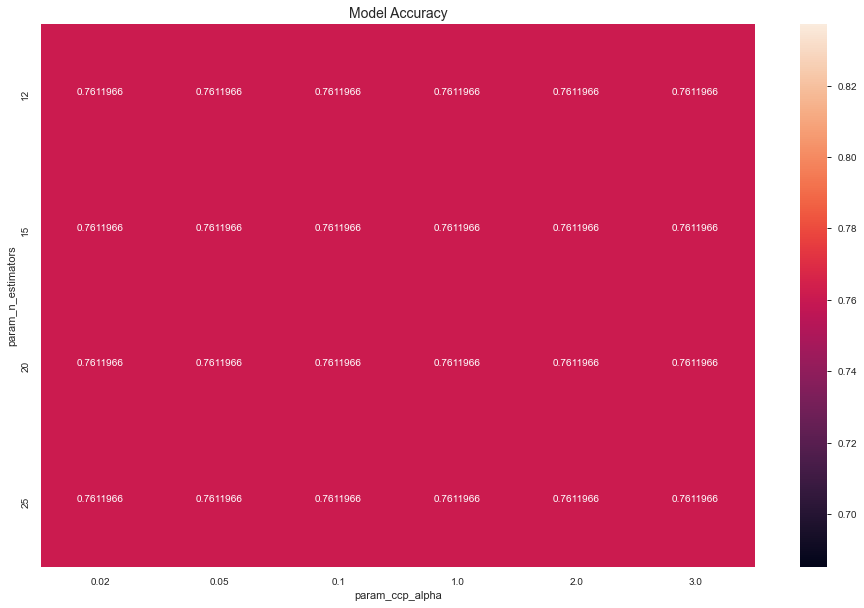

In [72]:
### Accuracy Heatmap
import seaborn as sns

max_scores1 = df_gridsearch2.groupby(['param_n_estimators', 
                                    'param_ccp_alpha']).max()

max_scores2 = max_scores1.unstack()[['mean_test_score']]

plt.figure(figsize = (16,10))

plt.title('Model Accuracy', 
              fontsize=14)

sns.heatmap(max_scores2.mean_test_score, annot=True, fmt='.7g');

In [74]:
max_scores2

mean_test_score                                          \
param_ccp_alpha               0.02      0.05      0.10      1.00      2.00   
param_n_estimators                                                           
12                        0.761197  0.761197  0.761197  0.761197  0.761197   
15                        0.761197  0.761197  0.761197  0.761197  0.761197   
20                        0.761197  0.761197  0.761197  0.761197  0.761197   
25                        0.761197  0.761197  0.761197  0.761197  0.761197   

                              
param_ccp_alpha         3.00  
param_n_estimators            
12                  0.761197  
15                  0.761197  
20                  0.761197  
25                  0.761197

In [34]:
type(CV_rfc)

sklearn.model_selection._search.GridSearchCV

In [35]:
import pickle

In [37]:
outfile = open('CV_Random_Forest.plk','wb')

In [38]:
pickle.dump(CV_rfc,outfile)

In [39]:
outfile.close()

In [50]:
pkl_filename = "CV_Random_Forest.plk"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_rfc, file)

In [51]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_cv = pickle.load(file)

In [52]:
type(pickle_cv)

sklearn.model_selection._search.GridSearchCV